### Student Information
Name: 盧子涵

Student ID: 113065542

GitHub ID: luzi2023

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [ ]:
### Begin Assignment Here

## **=========First Part========================================**

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
#Answer here
X.where(X['category_name'] == 'comp.graphics').dropna()

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
# X is in sorted index order while X_sample isn't
# the proportion of each category still remain the same
X_sample.head()

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [ ]:
# Answer here
import numpy as np
plt.figure(figsize=(8, 4))

x_cate_name = list(X['category_name'].value_counts())
sample_cate_name = list(X_sample['category_name'].value_counts())
plt.bar(np.arange(len(categories)) - 0.1, x_cate_name, width = 0.2)
plt.bar(np.arange(len(categories)) + 0.1, sample_cate_name, width = 0.2)

plt.xticks([0, 1, 2, 3], list(categories))
plt.title('Category distribution')
plt.legend(['category_name', 'category_name'])

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
X_counts[4, 0:100] # we can see that 1 exists in position 0 and 37
count_vect.get_feature_names_out()[37:38]

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# select only the vector that total exist frequency >= 400
# then we can observe the most significant words we have

from tqdm import trange

sum_freq = []
for i in trange(X_counts.shape[1]):
    cnt = 0
    for j in range(X_counts.shape[0]):
        if str(X_counts[j, i]) == '1':
            cnt += 1
    sum_freq.append(cnt)
# print(sum_freq)
remove_term_index = []
new_vect = []
for i in trange(len(sum_freq)):
    if sum_freq[i] <= 400:
        remove_term_index.append(i)
    else:
        new_vect.append(count_vect.get_feature_names_out()[i])
# print(len(remove_term_index))
# print(len(new_vect))
new_X_counts = []
for i in trange(X_counts.shape[0]):
    docs = []
    for j in range(X_counts.shape[1]):
        if j in remove_term_index:
            continue
        else:
            docs.append(X_counts[i, j])
    new_X_counts.append(docs)
# print(len(new_X_counts[0, 0]))

In [ ]:
import seaborn as sns
# Answer here
plot_x = ["term_"+str(i) for i in new_vect]
plot_y = ["doc_"+str(i) for i in list(X.index)[0:20]]
plot_z = new_X_counts[:20]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(19, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
# print(X_counts.toarray())

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here


### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
# Answer here
plt.subplots(figsize=(100, 10))
# min_freq_threshold = 400
# new_term_freq = []
# new_count_vect = []
# for i in trange(len(term_frequencies)):
#     if term_frequencies[i] >= min_freq_threshold:
#         new_term_freq.append(term_frequencies[i])
#         new_count_vect.append(count_vect.get_feature_names_out()[i])
# print(len(new_term_freq))
# print(len(new_count_vect))
g = sns.barplot(x=new_count_vect, 
            y=new_term_freq)
_ = g.set_xticklabels(new_count_vect, rotation = 90)

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
mapping = list(zip(new_count_vect, new_term_freq))
sorted_list = sorted(mapping, key=lambda x: x[1], reverse=True)
sorted_count_vect = []
sorted_term_freq = []
for vect, freq in sorted_list:
    sorted_count_vect.append(vect)
    sorted_term_freq.append(freq)
g = sns.barplot(x=sorted_count_vect, 
            y=sorted_term_freq)
# _ = g.set_xticklabels(sorted_count_vect, rotation = 90)

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [ ]:
# Answer here
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
# while doing the log transformation, we can decrease the effect of abnormal data to the dataset

In [ ]:
### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
# Answer here
def intersection(list1, list2):
    return [value for value in list1 if value in list2]

print(intersection(filtered_words_0, filtered_words_1))
# the similarity is that in each category the words were filtered were stemmed-similar, such as 'criterion', 'critically', 'criticise', they are all the extension of 'critic'

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [ ]:
# Answer Here
from PAMI.frequentPattern.topk import FAE as alg

trial_k = [500, 1000, 1500]
for k in trial_k:
    obj3 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)    #initialize
    obj3.mine()            #Start the mining process
    frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

    print(f"top_{k}_term")
    print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
    print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime
    
# bigger the k is longer the running time spending, but the bigger k result output more sparser model

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=[3, 6, 9]
for sup in minSup:
    obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=sup)
    obj3.mine()
    frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
    print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
# Answer here
X_pca_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
ax = plt.axes(projection='3d')
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter3D(xs, ys, zs, c=zs, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_3, 'PCA')
plot_scatter(axes[1], X_tsne_3, 't-SNE')
plot_scatter(axes[2], X_umap_3, 'UMAP')

plt.show()

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here

# Yes, the category_name column also work too
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X.head()

## **=========Second Part========================================**

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.frequentPattern.basic import FPGrowth as alg
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 


import helpers.data_mining_helpers as dmh 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [4]:
# take a look at first record
df['comment'][0]

'He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.'

In [5]:
# There are 1500 data in total
len(df)

1500

In [6]:
# generate python data frame
X = pd.DataFrame.from_records(dmh.format_rows(df['comment']), columns=['comment'])
X.head()

,comment
0,He was a singer with a golden voice that I lov...
1,The mist beautiful voice ever I listened to hi...
2,I have most of Mr. Reeves songs. Always love ...
3,30 day leave from 1st tour in Viet Nam to conv...
4,listening to his songs reminds me of my mum wh...


In [7]:
# add columns
label = {'not nostalgia':0, 'nostalgia':1}
X['category_name'] = df['sentiment']
X['category'] = X['category_name'].apply(lambda x:label.get(x))
X.head()

,comment,category_name,category
0,He was a singer with a golden voice that I lov...,not nostalgia,0
1,The mist beautiful voice ever I listened to hi...,nostalgia,1
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,1
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,0
4,listening to his songs reminds me of my mum wh...,nostalgia,1


In [8]:
# check missing values
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,category_name,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [9]:
# There is duplicated data
print(f"before drop duplicates data num: {len(X)}")
X[X.duplicated()]
X.drop_duplicates(keep=False, inplace=True)
print(f"after drop duplicates data num: {len(X)}")

before drop duplicates data num: 1500
after drop duplicates data num: 1498


<Axes: xlabel='category_name'>

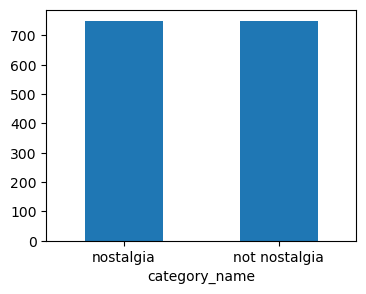

In [18]:
X['category_name'].value_counts().plot(kind='bar', rot=0, figsize=(4, 3))

In [21]:
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X.head()

,comment,category_name,category,unigrams
0,He was a singer with a golden voice that I lov...,not nostalgia,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,The mist beautiful voice ever I listened to hi...,nostalgia,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,listening to his songs reminds me of my mum wh...,nostalgia,1,"[listening, to, his, songs, reminds, me, of, m..."


In [61]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['comment']) #learn the vocabulary and return document-term matrix
print(X_counts.shape)

count_words = count_vect.get_feature_names_out()
count_term_document_df = pd.DataFrame(X_counts.toarray(), columns=count_words)
count_term_document_df

(1498, 3730)


,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **=========Third Part========================================**

In [44]:
# select only the vector that total exist frequency >= 400
# then we can observe the most significant words we have

from tqdm import trange

sum_freq = []
for i in trange(X_counts.shape[1]):
    cnt = 0
    for j in range(X_counts.shape[0]):
        if str(X_counts[j, i]) == '1':
            cnt += 1
    sum_freq.append(cnt)
# print(sum_freq)
remove_term_index = []
new_vect = []
for i in trange(len(sum_freq)):
    if sum_freq[i] <= 200:
        remove_term_index.append(i)
    else:
        new_vect.append(count_vect.get_feature_names_out()[i])
# print(len(remove_term_index))
# print(len(new_vect))
new_X_counts = []
for i in trange(X_counts.shape[0]):
    docs = []
    for j in range(X_counts.shape[1]):
        if j in remove_term_index:
            continue
        else:
            docs.append(X_counts[i, j])
    new_X_counts.append(docs)
# print(len(new_X_counts[0, 0]))

100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [02:23<00:00, 10.47it/s]


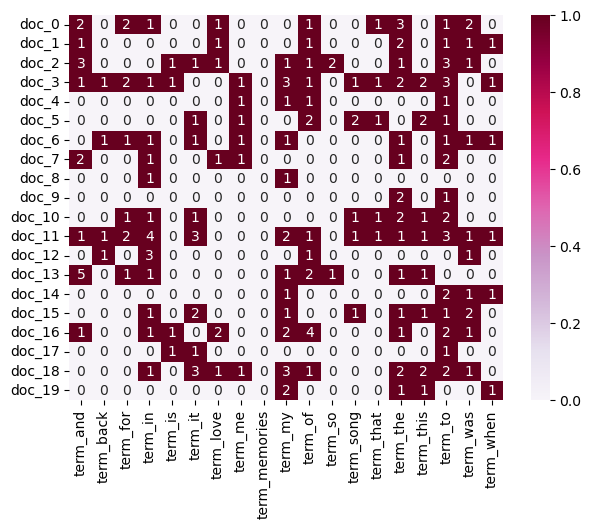

In [45]:
import seaborn as sns
# Answer here
plot_x = ["term_"+str(i) for i in new_vect]
plot_y = ["doc_"+str(i) for i in list(X.index)[0:20]]
plot_z = new_X_counts[:20]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(7, 5))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
# print(X_counts.toarray())

100%|█████████████████████████████████████████████████████████████████████████████| 3730/3730 [00:05<00:00, 656.14it/s]


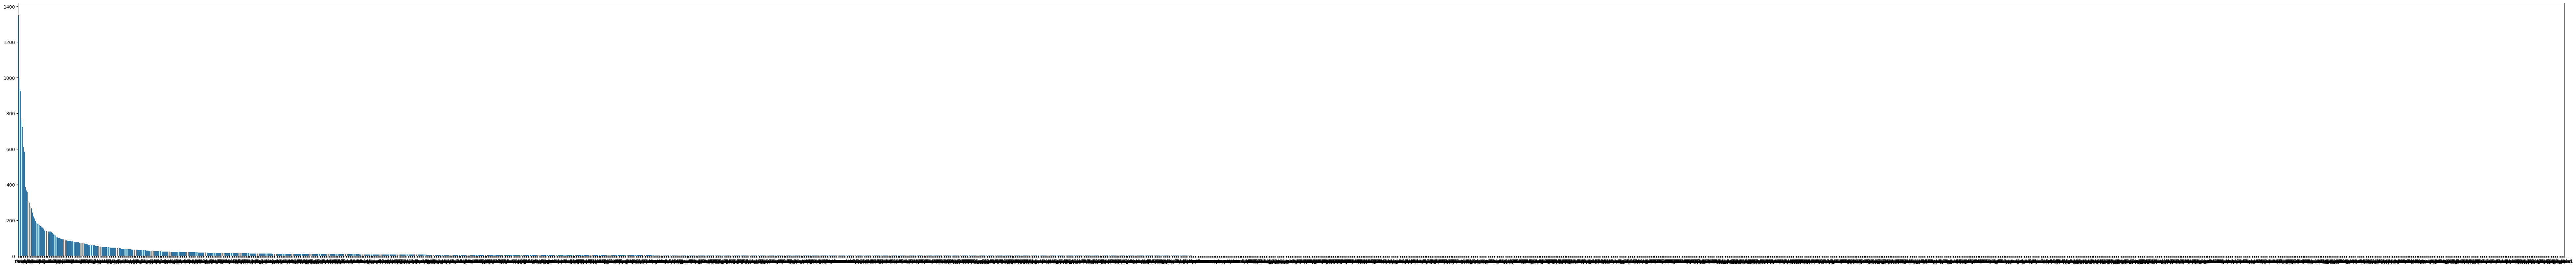

In [78]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
min_freq_threshold = 0
new_term_freq = []
new_count_vect = []
for i in trange(len(term_frequencies)):
    if term_frequencies[i] >= min_freq_threshold:
        new_term_freq.append(term_frequencies[i])
        new_count_vect.append(count_vect.get_feature_names_out()[i])
        
mapping = list(zip(new_count_vect, new_term_freq))
sorted_list = sorted(mapping, key=lambda x: x[1], reverse=True)
sorted_count_vect = []
sorted_term_freq = []
for vect, freq in sorted_list:
    sorted_count_vect.append(vect)
    sorted_term_freq.append(freq)
g = sns.barplot(x=sorted_count_vect, 
            y=sorted_term_freq)
# _ = g.set_xticklabels(sorted_count_vect, rotation = 90)

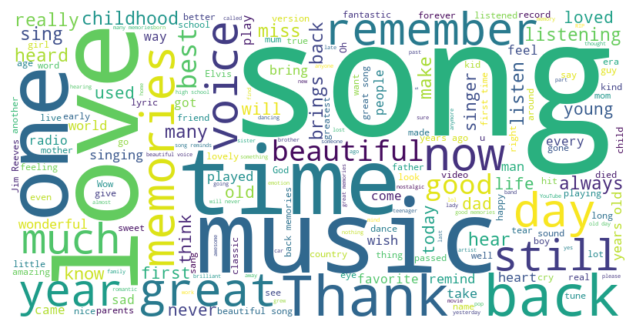

In [49]:
text = " ".join(X['comment'].values)  # Combine text for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
tfidf_count_vect = TfidfVectorizer()
X_tfidf_counts = tfidf_count_vect.fit_transform(X['comment'])
print(X_tfidf_counts.shape)

words = tfidf_count_vect.get_feature_names_out()
term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
print(term_document_df)

(1498, 3730)
      00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1493   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1494   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         

In [84]:
word_counts = term_document_df.sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

# filtered_words_0 = filtered_words


Number of terms in top 5%: 186
Filtered terms: ['00', 'masculine', 'massively', 'master', 'masterpieces', 'masters', 'matched', 'mate', 'marvin', 'material', 'matters', 'mcdonald', 'measure', 'medal', 'mederios', 'media', 'medicine', 'materialistic', 'mediterranean', 'marvellous', 'mark', 'maggie', 'magnificently', 'mail', 'maine', 'maker', 'malinda', 'managed', 'maro', 'managing', 'mangle', 'manhood', 'mankind', 'mant', 'mardi', 'marie', 'marin', 'mandolin', 'meeting', 'melbourne', 'mellowed', 'milestone', 'millennium', 'miller', 'miming', 'minds', 'minehead', 'mingo', 'miles', 'mining', 'mist', 'mistakes', 'misunderstood', 'mitch', 'mock', 'mocking', 'moms', 'miracles', 'microphones', 'microphone', 'miami', 'melodic', 'melodica', 'melodrama', 'melt', 'melted', 'melting', 'memorize', 'memorized', 'mended', 'mendes', 'merle', 'merry', 'mesmerized', 'mesmerizes', 'mess', 'messed', 'meta', 'madrid', 'monday', 'maddox', 'macias', 'latina', 'laughs', 'lawyers', 'leader', 'learning', 'legac

In [85]:
word_counts = term_document_df.sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Number of terms in bottom 1%: 37
Filtered terms: ['00', 'masculine', 'massively', 'master', 'masterpieces', 'masters', 'matched', 'mate', 'marvin', 'material', 'matters', 'mcdonald', 'measure', 'medal', 'mederios', 'media', 'medicine', 'materialistic', 'mediterranean', 'marvellous', 'mark', 'maggie', 'magnificently', 'mail', 'maine', 'maker', 'malinda', 'managed', 'maro', 'managing', 'mangle', 'manhood', 'mankind', 'mant', 'mardi', 'marie', 'marin']


In [87]:
word_sums = term_document_df.sum(axis=0)
    
# Sort the words by their total sum
sorted_words = word_sums.sort_values()
    
# Calculate the number of words to remove
total_words = len(sorted_words)
top_n = int(0.05 * total_words)
bottom_n = int(0.01 * total_words)
    
# Get the words to remove from the top 5% and bottom 1%
words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
# Return the DataFrame without the filtered words
filtered_term_document_df = term_document_df.drop(columns=words_to_remove)

In [91]:
# Create the DenseFormatDF object and convert to a transactional database
obj = db.DenseFormatDF(filtered_term_document_df)
obj.convert2TransactionalDatabase(f'td_freq_db_nostalgic.csv', '>=', 1)

Database size (total no of transactions) : 1464
Number of items : 3507
Minimum Transaction Size : 1
Average Transaction Size : 7.271174863387978
Maximum Transaction Size : 42
Standard Deviation Transaction Size : 5.814372595073421
Variance in Transaction Sizes : 33.830036622853704
Sparsity : 0.9979266681313408


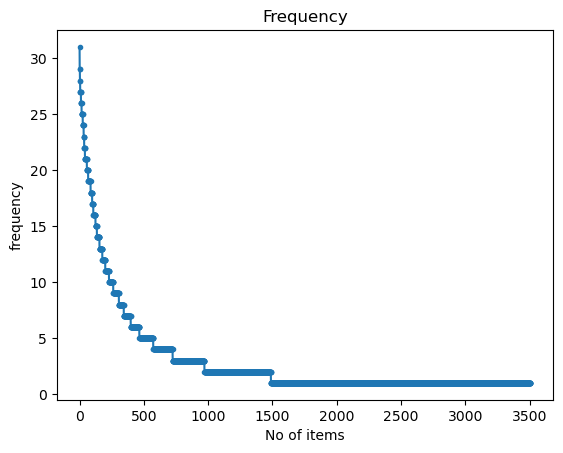

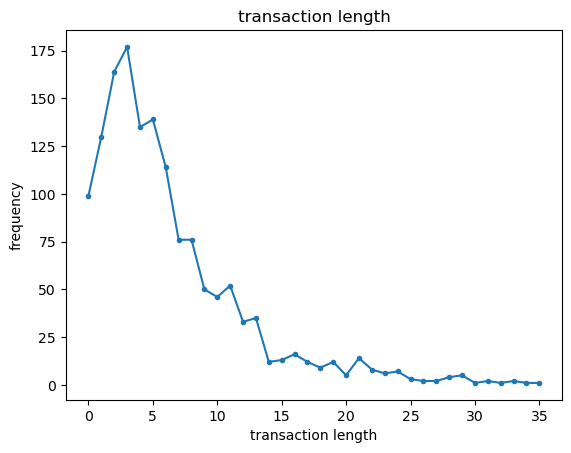

In [92]:
obj = tds.TransactionalDatabase('td_freq_db_nostalgic.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [95]:
minSup=9
obj = alg.FPGrowth(iFile='td_freq_db_nostalgic.csv', minSup=minSup)
obj.mine()
frequentPatternsDF= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

obj.save('freq_patterns_minSup9.txt') #save the patterns
frequentPatternsDF

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 308
Runtime: 0.01918768882751465


,Patterns,Support
0,comes,9
1,tunes,9
2,close,9
3,king,9
4,18,9
...,...,...
303,kid,28
304,playing,28
305,fantastic,29
306,even,29


In [100]:
# Create a mapping from numerical labels to category names
tdm_df = pd.DataFrame(X_tfidf_counts.toarray(), columns=words, index=X.index)

category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [107]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.313775,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicted result
Y_gnb_score = gnb.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, Y_gnb_score))
print("\nClassification Report:\n", classification_report(y_test, Y_gnb_score, target_names=target_names, digits=4))

# In this cell I used Gaussian Naive Bayes as the method, which is different from the method used in lab. The main reason for this change is that the 
# TF-IDF vector is continous value, not the same as multinomial value

Accuracy: 0.6511111111111111

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7182    0.5508    0.6235       236
    nostalgia     0.6059    0.7617    0.6749       214

     accuracy                         0.6511       450
    macro avg     0.6621    0.6563    0.6492       450
 weighted avg     0.6648    0.6511    0.6480       450



## **=========Fourth Part========================================**

Overall, we will prefer the code to be modularize, such as structuring into functions, making it easier to call specific parts as needed. Next, if we weant to see the result, we won't print it all out